In [1]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Load pre-processed data and drop missing values
reviews = io.load('preproc_reviews').dropna()
top_reviews = reviews.sort_values('star_rating', ascending = False).head(n = 100)

2019-06-14 17:31:40,466 - kedro.io.data_catalog - INFO - Loading data from `preproc_reviews` (CSVLocalDataSet)...


In [3]:
pos_tokens = defaultdict(int)

for row in top_reviews['review_text']:
    # This is a good place to strip punctuation
    try:
        review = re.sub(r'[^a-zA-Z\s]*', '', row)
        review = re.sub(r"[']*", '', review)
    except:
        review = ''
        print(row)

    # This is a good place to fold case using the lower() method
    review = review.lower()

    # tokens is a list of words
    tokens = nltk.word_tokenize(review)

    # # Here is one possible stemmer, you can use it with porter.stem(token)
    # porter = nltk.PorterStemmer()
    # stemmed_tokens = []
    # for token in tokens:
    #     stemmed_tokens.append(porter.stem(token))

    # And then we only want tokens that aren't in the list
    for token in tokens:
        if token not in stopwords.words():
            pos_tokens[token] += 1

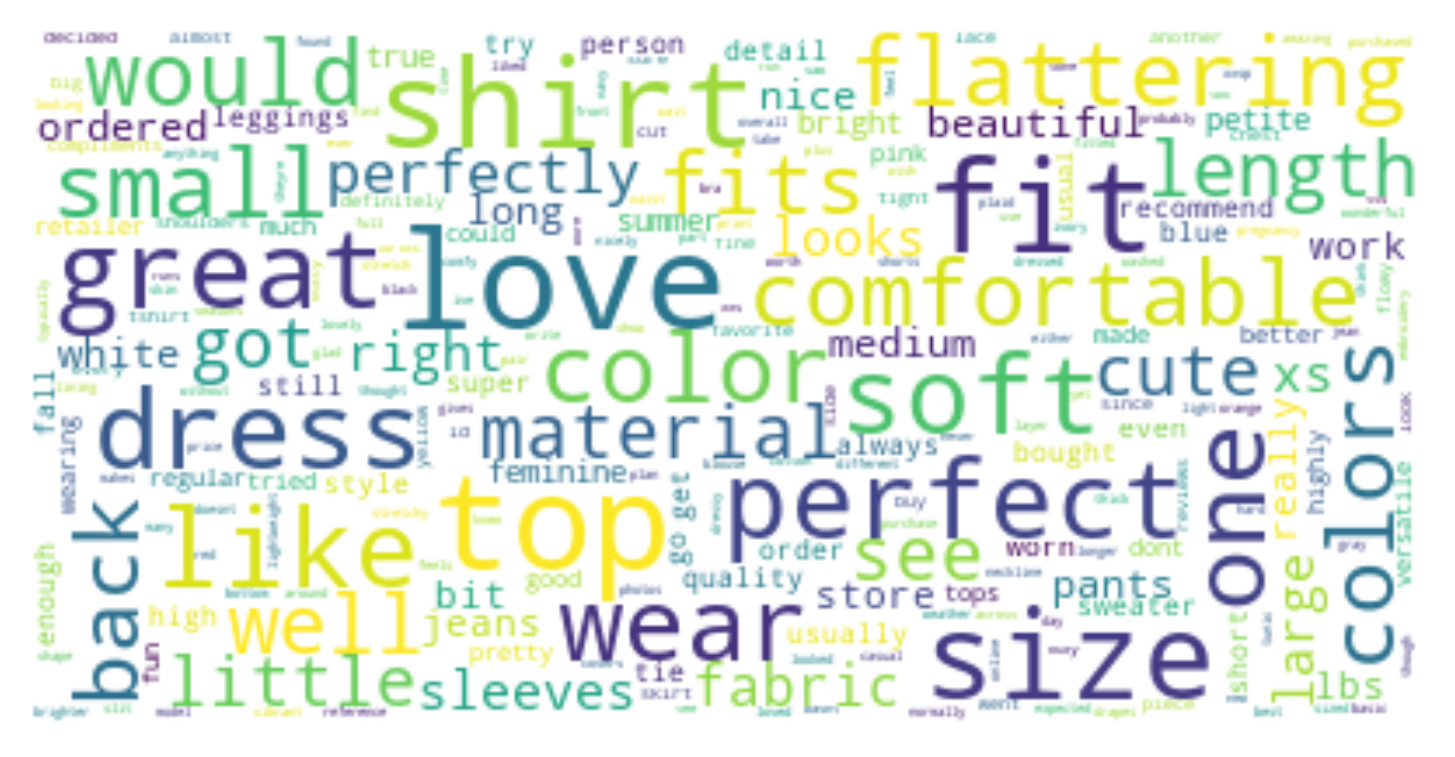

In [7]:
wc = WordCloud(background_color="white", max_words=1000, max_font_size=40)

# generate word cloud
wc.generate_from_frequencies(pos_tokens)
plt.figure(dpi = 300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()